In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


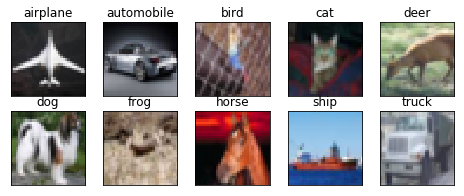

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [31]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 25s 64ms/step - loss: 1.9109 - acc: 0.2672 - val_loss: 1.4213 - val_acc: 0.4771
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3753 - acc: 0.5041 - val_loss: 1.1301 - val_acc: 0.5966
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1510 - acc: 0.5957 - val_loss: 0.9662 - val_acc: 0.6597
Epoch 4/100
390/390 [==============================] - 20s 53ms/step - loss: 0.9966 - acc: 0.6505 - val_loss: 0.8553 - val_acc: 0.6972
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8915 - acc: 0.6910 - val_loss: 0.8078 - val_acc: 0.7173
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8199 - acc: 0.7183 - val_loss: 0.7462 - val_acc: 0.7438
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7631 - acc: 0.7390 - val_loss: 0.7082 - val_acc: 0.7594
Epoch 8/100
390/390 [==============================] - 

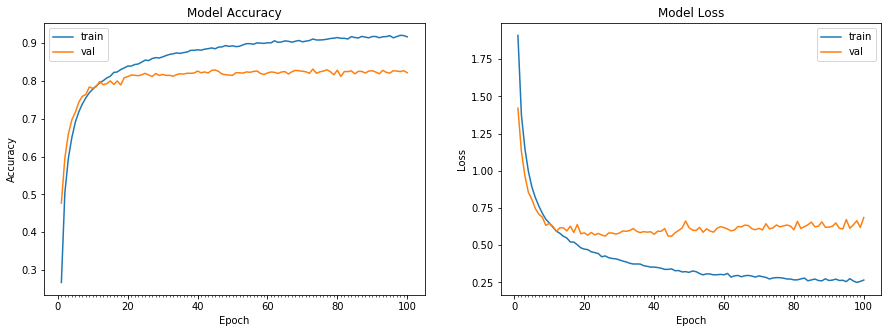

Accuracy on test data is: 82.16


In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**The baseline accuracy is 83.14% at epoch 73/100.**

**Architecture without BatchNormalization with RF 46 gave 78% validation accuracy.**

**Architecture with 32 RF and without BN gave 77.46% validation accuracy. Model with 32, 64,... channels had 76% validation accuracy**

In [28]:
# Define the model2
#  84.33% validation accuracy

model2 = Sequential()
model2.add(Convolution2D(48, 3, 3, border_mode='same', activation='relu', input_shape=(32, 32, 3))) # 3 32x32x48
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(48, 3, 3, border_mode='same', activation='relu')) # 5 32x32x48
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(48, 3, 3, border_mode='same', activation='relu')) # 7 32x32x48
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(96, 1, 1, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 14 16x16x48
model2.add(BatchNormalization())
model2.add(Convolution2D(96, 3, 3, border_mode='same', activation='relu')) # 16 16x16x96
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(96, 3, 3, border_mode='same', activation='relu')) # 18 16x16x96
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(96, 3, 3, border_mode='same', activation='relu')) # 20 32x32x48
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(192, 1, 1, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 40 8x8x96
model2.add(BatchNormalization())
model2.add(Convolution2D(192, 3, 3, border_mode='same', activation='relu')) # 42 8x8x192
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(192, 3, 3, border_mode='same', activation='relu')) # 44 8x8x192
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(Convolution2D(192, 3, 3, border_mode='same', activation='relu')) # 46 8x8x192
model2.add(Dropout(0.1))
model2.add(Convolution2D(num_classes, 8, 8))
model2.add(Flatten())
model2.add(Activation('softmax'))
# Compile the model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/pyth

In [29]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
dropout_62 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 48)        20784     
_________________________________________________________________
dropout_63 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 48)        20784     
__________

In [30]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 72s 184ms/step - loss: 1.4869 - acc: 0.4923 - val_loss: 1.1635 - val_acc: 0.5851
Epoch 2/100
390/390 [==============================] - 68s 173ms/step - loss: 0.8989 - acc: 0.6848 - val_loss: 0.8640 - val_acc: 0.6991
Epoch 3/100
390/390 [==============================] - 68s 173ms/step - loss: 0.6918 - acc: 0.7594 - val_loss: 0.7563 - val_acc: 0.7349
Epoch 4/100
390/390 [==============================] - 68s 173ms/step - loss: 0.5745 - acc: 0.7994 - val_loss: 0.8068 - val_acc: 0.7237
Epoch 5/100
390/390 [==============================] - 68s 174ms/step - loss: 0.4853 - acc: 0.8302 - val_loss: 0.6731 - val_acc: 0.7743
Epoch 6/100
390/390 [==============================] - 68s 173ms/step - loss: 0.4203 - acc: 0.8523 - val_loss: 0.7200 - val_acc: 0.7568
Epoch 7/100
390/390 [==============================] - 68s 174ms/step - loss: 0.3565 - acc: 0.8768 - val_loss: 0.6782 - val_acc: 0.7742
Epoch 8/100
390/390 [===========================

KeyboardInterrupt: ignored

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 69, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=69)`
  if sys.path[0] == '':


Epoch 1/69
390/390 [==============================] - 68s 173ms/step - loss: 0.0715 - acc: 0.9763 - val_loss: 0.9041 - val_acc: 0.8325
Epoch 2/69
390/390 [==============================] - 68s 173ms/step - loss: 0.0698 - acc: 0.9770 - val_loss: 0.9622 - val_acc: 0.8216
Epoch 3/69
390/390 [==============================] - 68s 174ms/step - loss: 0.0791 - acc: 0.9734 - val_loss: 0.9517 - val_acc: 0.8177
Epoch 4/69
390/390 [==============================] - 68s 174ms/step - loss: 0.0691 - acc: 0.9765 - val_loss: 1.0156 - val_acc: 0.8121
Epoch 5/69
390/390 [==============================] - 68s 173ms/step - loss: 0.0685 - acc: 0.9775 - val_loss: 0.9383 - val_acc: 0.8227
Epoch 6/69
390/390 [==============================] - 68s 174ms/step - loss: 0.0611 - acc: 0.9796 - val_loss: 0.9446 - val_acc: 0.8280
Epoch 7/69
390/390 [==============================] - 68s 174ms/step - loss: 0.0672 - acc: 0.9775 - val_loss: 0.9623 - val_acc: 0.8195
Epoch 8/69
390/390 [==============================] - 6

**Highest validation accuracy of 84.33% at epoch 49/69 (actually 80/100 as training continued from previous cell.**